# Predicting House Prices: A Regression Example
### The Boston Housing Price dataset

In [2]:
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 1s 10us/step


In [4]:
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)
print("Train targets sample (10): ", train_targets[:10]) #in thousand dollars

Train data shape:  (404, 13)
Test data shape:  (102, 13)
Train targets sample (10):  [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


### Preparing the Data

In [5]:
# Using Feature-wise Normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data /= mean
test_data /= std

In [12]:
print("First 5 samples of each features of train data:\n\n", train_data)
print("\n")
print("First 5 samples of each features of test data:\n\n", test_data)

First 5 samples of each features of train data:

 [[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


First 5 samples of each features of test data:

 [[0.52320988 0.         0.23960173 ... 0.49748932 0.00081715 0.31468559]
 [0.00356693 0.         0.13250902 ... 0.43838168 0.01184339 0.17559564]
 [0.00159035 0.         0.06870348 ... 0.49748932 0.01190187 0.10550904]
 ...
 [0.05305324 0.         0.25919347 ... 0.36203431 0.01168326 0.0207985 ]
 [0.01035999 0.         0.08207352 ... 0.4285304  0.01174594 0.10518406]
 [0.08459494 0.         0.25919347 ..

### Building your Network

In [13]:
from keras import layers
from keras import models

In [29]:
def build_model(l=[64,64], a=['relu', 'relu'], opt='rmsprop', loss='mse', met=['mae']):
    assert(len(l) == len(a))
    model = models.Sequential()
    model.add(layers.Dense(l[0], activation=a[0], input_shape=(train_data.shape[1],)))
    for lx, ax in zip(l[1:], a[1:]):   
        model.add(layers.Dense(lx, activation=ax))
        
    model.add(layers.Dense(1))
    model.compile(optimizer=opt, loss=loss, metrics=met)
    return model

In [30]:
model1 = build_model()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Validation your approach using K-fold validation

In [31]:
import numpy as np

In [34]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [35]:
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]
    ], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

W0819 23:51:53.609168 140330103392064 deprecation_wrapper.py:119] From /home/reljod/.virtualenvs/tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0819 23:51:53.614516 140330103392064 deprecation_wrapper.py:119] From /home/reljod/.virtualenvs/tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [38]:
print("All scores: ", all_scores)
print("All scores mean: ", np.mean(all_scores))

All scores:  [2.450157446436363, 2.1075122828530795, 2.8739123745719986, 2.4534424873861935]
All scores mean:  2.471256147811909


### Let's try for 500 epochs and see  the plot:

In [45]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]
    ], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


### Building the history of successive mean K-fold validation scores

In [46]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print("Average MAE history (10): ", average_mae_history[:10])

Average MAE history (10):  [4.238748800636518, 3.1772040211328187, 2.969471237447002, 2.664549109959366, 2.620103695605061, 2.5329571785313068, 2.4817589261744284, 2.551448837365254, 2.478952195384715, 2.5304773644645615]


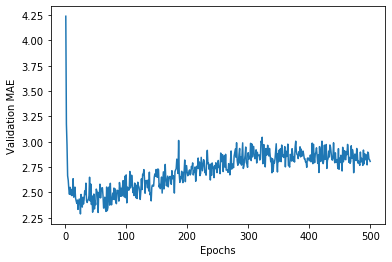

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [48]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

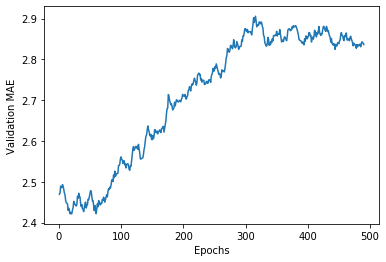

In [49]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [63]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

In [64]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/step


In [65]:
print("Test MAE score: ", test_mae_score)

Test MAE score:  29.251825070848653
